AirBnb
The goal of this project is to predict Airbnb's users first location that is booked using user demographic and activity information. This is actually a kaggle competition, so the data is taken from there. The features that will be reviewed for validity in the prediction will be demographic data, timestamp activity on the website, devices used, browsers, affiliate information, language preferences. I will expand on this goal by also trying to predict the amount of 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
loc = r"C:\Users\user\Desktop\kagglehelp\airbnb"
tr_users=pd.read_csv(loc+"\\train_users_2.csv")

In [3]:
tr_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [4]:
x_cols=[i for i in tr_users.columns.values[4:-1]]
tr_users.head()
    

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
# transform label type columns for usability in pandas
tr_users.dtypes
from sklearn.preprocessing import LabelEncoder
# Label encoder applies a numeric label. inverse_transform - transforms it back

tr_users=tr_users.apply(LabelEncoder().fit_transform)
print tr_users.head()
tr_users_plt=tr_users[x_cols]

       id  date_account_created  timestamp_first_active  date_first_booking  \
0  100522                   170                       0                   0   
1   48038                   501                       1                   0   
2   26484                   262                       2                 193   
3   68503                   695                       3                 959   
4   48955                   248                       4                  34   

   gender    age  signup_method  signup_flow  language  affiliate_channel  \
0       0  27185              1            0         5                  2   
1       2     27              1            0         5                  7   
2       1     45              0            3         5                  2   
3       1     31              1            0         5                  2   
4       0     30              0            0         5                  2   

   affiliate_provider  first_affiliate_tracked  signup_app  fi

C:\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [12]:
for k,v in tr_users_plt.age.iteritems():
#     print k
    if tr_users_plt['age'][k]>100:
        tr_users_plt.loc[k,'age']=np.NaN
    if k % 10000 == 0:
        print k
#         print tr_users_plt['age'][k]
        
#     tr_users_plt['age'>100]=np.nan


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


In [20]:
# export the new ages
import csv
with open(loc+'\\ages.csv', 'wb') as f:
    writer=csv.writer(f)
    writer.writerow(['Age'])
    for i in tr_users_plt.age:
        writer.writerow([str(i)])
    

In [18]:
loc

'C:\\Users\\user\\Desktop\\kagglehelp\\airbnb'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000008B00CA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000008D20EF98>]], dtype=object)

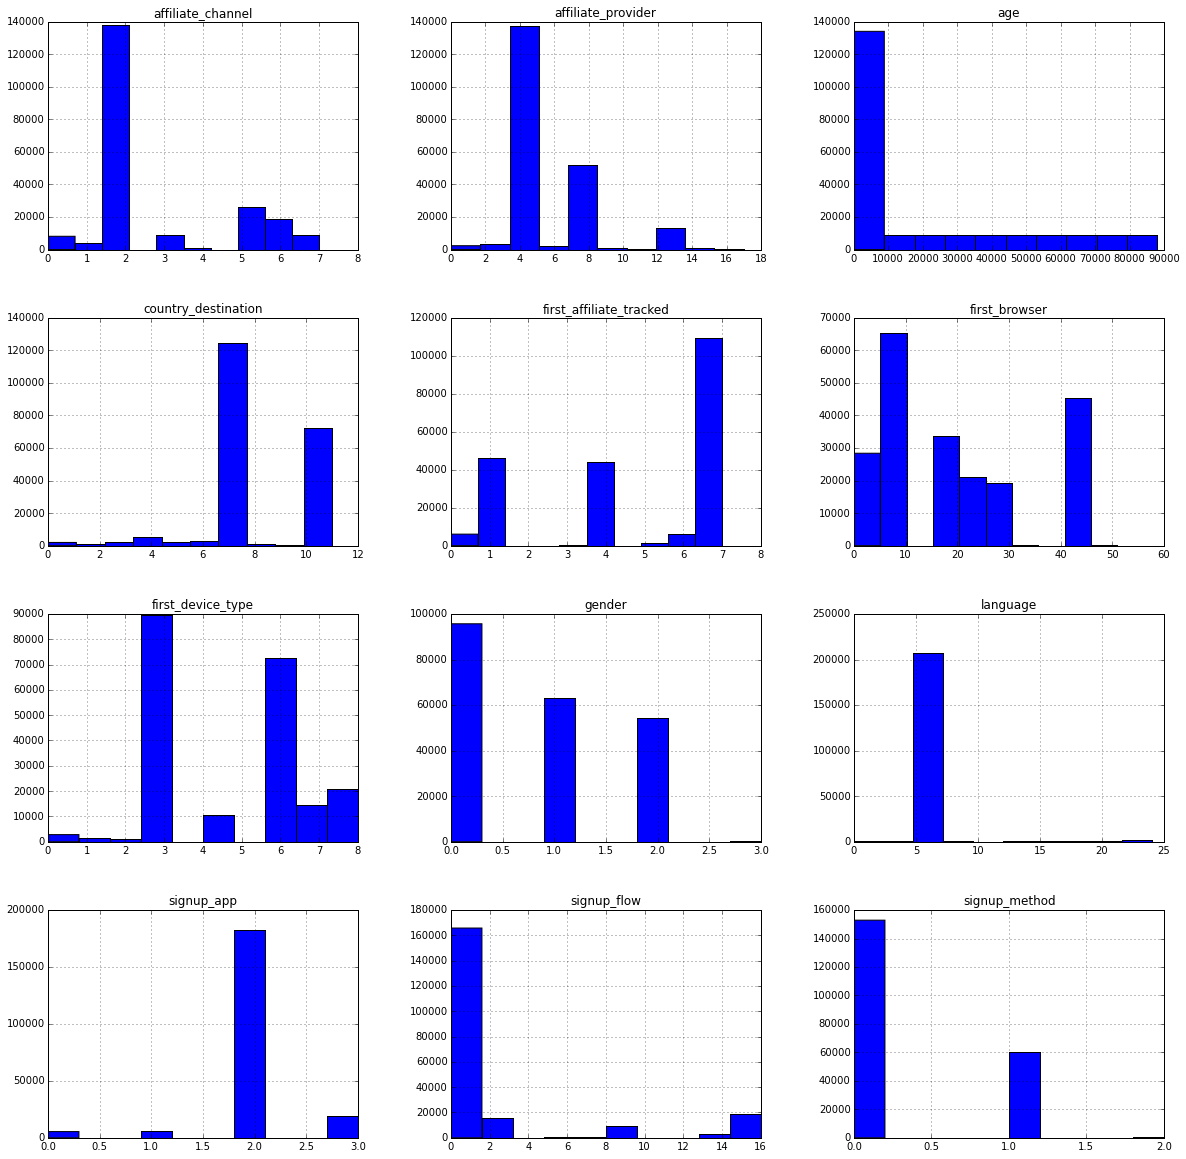

In [76]:
%matplotlib inline
tr_users_plt.hist(figsize=(20,20))

In [ ]:
# split the data into arrays
# use train_test_split
# call classifier
# fit classifier
# score classifier

# note train_test_split takes only arrays
from sklearn.cross_validation import train_test_split
# split x and y data 
y=tr_users.values[:,-1]
X=tr_users.values[:,1:-2]

print y[:20]
print X[:20]





In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# fit the naive bayes model
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train, y_train)

# predict from the model
# pred=clf.predict(X_test)

# mean accuracy on test data and labels
clf.score(X_test,y_test)

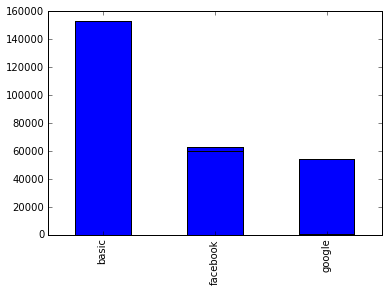

In [81]:
tr_users.gender.value_counts()

# plt.figure(1)
# plt.subplot(211)
# plt.title('gender')
p1=tr_users.gender.value_counts().plot(kind='bar')
# p1.xticks(range(len(tr_users.gender.values())), tr_users.gender.values(), rotation=90)
# plt.subplot(212)
p2=tr_users.signup_method.value_counts().plot(kind='bar')


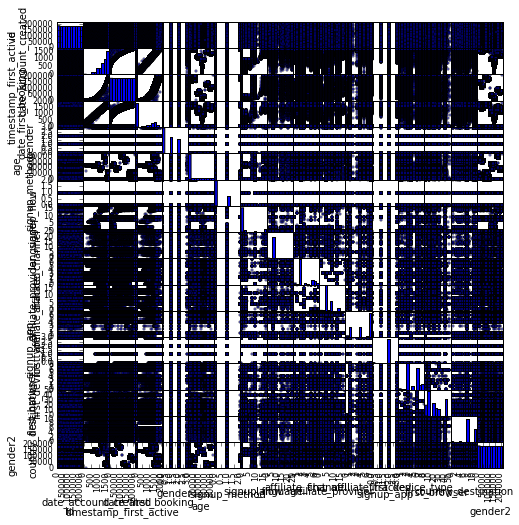

In [58]:
from pandas.tools.plotting import scatter_matrix
# columns to use


scat=scatter_matrix(tr_users, figsize=(8,8))